<a href="https://colab.research.google.com/github/jmtoral/mna-mlops-team46/blob/master/1_clean_data_jmtoral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Maestría en Inteligencia Artificial Aplicada
## Equipo 46
<center>

[![Institution](https://img.shields.io/badge/Institution-Tecnológico%20de%20Monterrey-1F497D?style=for-the-badge&logo=tecnologicodemonterrey)](https://tec.mx)
[![Course](https://img.shields.io/badge/Course-Operaciones%20de%20Aprendizaje%20Automático-FF6B6B?style=for-the-badge&logo=python)](https://tec.mx)
[![Activity](https://img.shields.io/badge/Pipeline%201-Limpieza-F9AB00?style=for-the-badge&logo=googlecolab)](https://colab.research.google.com)

</center>

---
## ⚙️ **Operaciones de Aprendizaje Automático (MLOps)**
### 👨‍🏫 **Profesores**
- **Profesores Titulares:** Dr. Gerardo Rodríguez Hernández, Mtro. Ricardo Valdez Hernández, Mtra. María Mylen Treviño Elizondo
- **Profesor Tutor:** Dr. José Carlos Soto Monterrubio

---
## 📊 **Pipeline 1: Limpieza,  estandarización y disponibilización de datos**
- **Descripción:** Implementación de un pipeline versionado para la limpieza, análisis y modelado del dataset German Credit.

---
## 👥 **Equipo de Trabajo**
### 🚀 **Integrantes y Roles**

| Integrante | Matrícula | Rol |
|---|---|---|
| Jesús Alberto Jiménez Ramos | `A01796903` | 📊 Data Engineer |
| Mónica María Del Rivero Sánchez | `A01362368` | 👩‍🔬 Data Scientist |
| Montserrat Gaytán Morales | `A01332220` | 💻 Software Engineer |
| José Manuel Toral Cruz | `A01122243` | 🤖 ML Engineer |
| Jeanette Rios Martinez | `A01688888` | 🛠️ SRE / DevOps |




---

### **1️⃣ Limpieza y Validación de Datos: Metodología Detallada**


---
## 🛠️ **Bibliotecas y Herramientas Utilizadas**
| Herramienta | Descripción | Uso Principal |
|---|---|---|
| **Pandas** | Biblioteca para manipulación y análisis de datos. | Limpieza, transformación y análisis de tablas. |
| **NumPy** | Soporte para vectores y matrices de gran tamaño. | Operaciones numéricas y manejo de nulos. |
| **Matplotlib & Seaborn**| Bibliotecas para visualización de datos. | Creación de gráficos para el EDA. |
| **Scikit-learn** | Ecosistema de herramientas de Machine Learning. | Preprocesamiento y modelado. |
| **Git & GitHub** | Sistema de control de versiones. | Versionado de código y colaboración. |
| **DVC** | Data Version Control. | Versionado de grandes archivos de datos y modelos. |

| Nombre Original | Nombre en Inglés | Descripción del Contenido | Tipo de Variable |
| :--- | :--- | :--- | :--- |
| **laufkont** | status | Estado de la cuenta corriente del deudor. | Categórica |
| **laufzeit** | duration | Duración del crédito en meses. | Cuantitativa |
| **moral** | credit_history | Historial de cumplimiento de créditos anteriores. | Categórica |
| **verw** | purpose | Propósito para el cual se solicita el crédito. | Categórica |
| **hoehe** | amount | Monto del crédito en marcos alemanes (DM). | Cuantitativa |
| **sparkont** | savings | Ahorros del deudor. | Categórica |
| **beszeit** | employment_duration | Duración del empleo actual del deudor. | Ordinal |
| **rate** | installment_rate | Cuotas del crédito como porcentaje del ingreso disponible. | Ordinal |
| **famges** | personal_status_sex | Información combinada sobre sexo y estado civil. | Categórica |
| **buerge** | other_debtors | Si existe otro deudor o garante para el crédito. | Categórica |
| **wohnzeit** | present_residence | Tiempo (en años) que el deudor ha vivido en su residencia actual. | Ordinal |
| **verm** | property | La propiedad más valiosa del deudor. | Ordinal |
| **alter** | age | Edad en años. | Cuantitativa |
| **weitkred** | other_installment_plans | Planes de pago a plazos con otros proveedores. | Categórica |
| **wohn** | housing | Tipo de vivienda en la que vive el deudor. | Categórica |
| **bishkred** | number_credits | Número de créditos que el deudor tiene en este banco. | Ordinal |
| **beruf** | job | Calidad del trabajo del deudor. | Ordinal |
| **pers** | people_liable | Número de personas que dependen financieramente del deudor. | Binaria |
| **telef** | telephone | Si el deudor tiene una línea telefónica fija a su nombre. | Binaria |
| **gastarb** | foreign_worker | Si el deudor es un trabajador extranjero. | Binaria |
| **kredit** | credit_risk | Si el crédito fue pagado (bueno) o no (malo). | Binaria |

In [137]:
#@title CELDA 1: Instalación de dependencias
#!pip install dvc[gs,s3,ssh,gdrive]

import gdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import userdata
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración para mostrar todas las columnas en los resultados de pandas
pd.set_option('display.max_columns', None)

print("Todo fue instalado con éxito.")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print(f"Versión de matplotlib: {matplotlib.__version__}")
print(f"Versión de seaborn: {sns.__version__}")

Todo fue instalado con éxito.
Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de matplotlib: 3.10.0
Versión de seaborn: 0.13.2


In [138]:
#@title CELDA 2: Creación de carpeta temporal

nombre_carpeta = "data/raw"

ruta_dataset = os.path.join(os.getcwd(), nombre_carpeta)

if not os.path.exists(ruta_dataset):
    os.makedirs(ruta_dataset)
    print(f"Carpeta '{nombre_carpeta}' creada en: {ruta_dataset}")
else:
    print(f"La carpeta '{nombre_carpeta}' ya existe en: {ruta_dataset}")

La carpeta 'data/raw' ya existe en: /content/data/raw


In [139]:
#@title CELDA 3: Descargar y cargar los datasets original y modificado

file_id_original = '1E5o5k4UPjFwPi9D528dAg75hZftrHE1J'
file_id_modified = '1OjHs6Ec7m04snvR5erV_gmI-9apjHX67'

output_path_original = os.path.join(ruta_dataset, 'german_credit_original.csv')
output_path_modified = os.path.join(ruta_dataset, 'german_credit_modified.csv')

try:
    # Descargar el dataset original
    gdown.download(f'https://drive.google.com/uc?id={file_id_original}', output_path_original, quiet=False)
    print(f"Archivo original descargado exitosamente en: {output_path_original}")

    # Cargar el dataset original
    df_original = pd.read_csv(output_path_original)
    print("Dataset original cargado exitosamente en df_original.")

    # Descargar el dataset modificado
    gdown.download(f'https://drive.google.com/uc?id={file_id_modified}', output_path_modified, quiet=False)
    print(f"Archivo modificado descargado exitosamente en: {output_path_modified}")

    # Cargar el dataset modificado
    df_modified = pd.read_csv(output_path_modified)
    print("Dataset modificado cargado exitosamente en df_modified.")

    print("\n--- Primeras filas del dataset original ---")
    display(df_original.head())

    print("\n--- Primeras filas del dataset modificado por los profesores ---")
    display(df_modified.head())


except Exception as e:
    print(f"Ocurrió un error al descargar o cargar los archivos: {e}")

Downloading...
From: https://drive.google.com/uc?id=1E5o5k4UPjFwPi9D528dAg75hZftrHE1J
To: /content/data/raw/german_credit_original.csv
100%|██████████| 46.9k/46.9k [00:00<00:00, 64.3MB/s]


Archivo original descargado exitosamente en: /content/data/raw/german_credit_original.csv
Dataset original cargado exitosamente en df_original.


Downloading...
From: https://drive.google.com/uc?id=1OjHs6Ec7m04snvR5erV_gmI-9apjHX67
To: /content/data/raw/german_credit_modified.csv
100%|██████████| 96.8k/96.8k [00:00<00:00, 72.7MB/s]

Archivo modificado descargado exitosamente en: /content/data/raw/german_credit_modified.csv
Dataset modificado cargado exitosamente en df_modified.

--- Primeras filas del dataset original ---


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1



--- Primeras filas del dataset modificado por los profesores ---


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,mixed_type_col
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,bad
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,NaN
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,unknown
3,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
4,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,NaN,4.0,2.0,38.0,1.0,2.0,2.0,2.0,error,1.0,1.0,1.0,208


In [140]:
#@title CELDA 5: Renombrar columnas a inglés

# Diccionario para mapear los nombres de las columnas de alemán a inglés (según la tabla)
column_mapping = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

# Renombrar columnas en df_original
df_original.rename(columns=column_mapping, inplace=True)

# Renombrar columnas en df_modified
df_modified.rename(columns=column_mapping, inplace=True)

print("Nombres de columnas en df_original después de renombrar:")
print(df_original.columns.tolist())

print("\nNombres de columnas en df_modified después de renombrar:")
print(df_modified.columns.tolist())

Nombres de columnas en df_original después de renombrar:
['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

Nombres de columnas en df_modified después de renombrar:
['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'mixed_type_col']


In [141]:
#@title Tabla comparativa de información general de los datasets

def dataframe_info_to_dataframe(df, suffix):
    """Convierte la información de un DataFrame a un DataFrame."""
    info = []
    total_rows = df.shape[0] # Obtener el número total de filas
    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        info.append({'Column': col, f'Non-Null Count ({suffix})': non_null_count, f'Dtype ({suffix})': dtype, f'Total Rows ({suffix})': total_rows}) # Agregar el total de filas
    return pd.DataFrame(info)

# Obtener información de ambos DataFrames como DataFrames separados
info_df_original = dataframe_info_to_dataframe(df_original, 'Original')
info_df_modified = dataframe_info_to_dataframe(df_modified, 'Modificado')

# Combinar los DataFrames de información
# Usamos 'outer' join para incluir todas las columnas de ambos DataFrames
comparative_info_df = pd.merge(info_df_original, info_df_modified, on='Column', how='outer')

print("--- Tabla Comparativa de Información General de los Datasets ---")
display(comparative_info_df)

--- Tabla Comparativa de Información General de los Datasets ---


,Column,Non-Null Count (Original),Dtype (Original),Total Rows (Original),Non-Null Count (Modificado),Dtype (Modificado),Total Rows (Modificado)
0,age,1000.0,int64,1000.0,1009,object,1020
1,amount,1000.0,int64,1000.0,1012,object,1020
2,credit_history,1000.0,int64,1000.0,1003,object,1020
3,credit_risk,1000.0,int64,1000.0,1004,object,1020
4,duration,1000.0,int64,1000.0,1010,object,1020
5,employment_duration,1000.0,int64,1000.0,1003,object,1020
6,foreign_worker,1000.0,int64,1000.0,1005,object,1020
7,housing,1000.0,int64,1000.0,1015,object,1020
8,installment_rate,1000.0,int64,1000.0,1011,object,1020
9,job,1000.0,int64,1000.0,1008,object,1020


In [142]:
#@title Tabla comparativa de Estadísticas Descriptivas

# Obtener las estadísticas descriptivas de ambos DataFrames
describe_original = df_original.describe().T
describe_modified = df_modified.describe().T

# Renombrar las columnas para evitar conflictos al unir
describe_original = describe_original.add_suffix('_Original')
describe_modified = describe_modified.add_suffix('_Modified')

# Combinar las estadísticas descriptivas
# Usamos 'outer' join para incluir todas las columnas de ambos DataFrames
comparative_describe_df = pd.merge(describe_original, describe_modified, left_index=True, right_index=True, how='outer')

print("--- Tabla Comparativa de Estadísticas Descriptivas ---")
display(comparative_describe_df)

--- Tabla Comparativa de Estadísticas Descriptivas ---


,count_Original,mean_Original,std_Original,min_Original,25%_Original,50%_Original,75%_Original,max_Original,count_Modified,unique_Modified,top_Modified,freq_Modified
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0,1009,84,26.0,51
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0,1012,931,1393.0,3
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0,1003,29,2.0,497
credit_risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0,1004,15,1.0,664
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,1010,58,24.0,172
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0,1003,19,3.0,312
foreign_worker,1000.0,1.963,0.188856,1.0,2.0,2.0,2.00,2.0,1005,19,2.0,911
housing,1000.0,1.928,0.530186,1.0,2.0,2.0,2.00,3.0,1015,18,2.0,671
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,1011,14,4.0,456
job,1000.0,2.904,0.653614,1.0,3.0,3.0,3.00,4.0,1008,26,3.0,588


In [143]:
#@title Eliminar 'mixed_type_col'

print("--- Eliminando la columna 'mixed_type_col' de df_modified ---")

if 'mixed_type_col' in df_modified.columns:
    df_modified.drop('mixed_type_col', axis=1, inplace=True)
    print("Columna 'mixed_type_col' eliminada exitosamente.")
else:
    print("La columna 'mixed_type_col' no se encontró en df_modified.")

print("\n--- Columnas restantes en df_modified ---")
print(df_modified.columns.tolist())

--- Eliminando la columna 'mixed_type_col' de df_modified ---
Columna 'mixed_type_col' eliminada exitosamente.

--- Columnas restantes en df_modified ---
['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']


In [144]:
#@title Conteo de Categorías para objetivo

print("--- Conteo de Categorías para la columna 'credit_risk' en df_modified ---")

# Generar y mostrar una tabla de conteo para 'credit_risk'
col = 'credit_risk'
print(f"\nConteo de categorías para '{col}':")
display(df_modified[col].value_counts().reset_index(name='count'))

--- Conteo de Categorías para la columna 'credit_risk' en df_modified ---

Conteo de categorías para 'credit_risk':


,credit_risk,count
0,1.0,664
1,0.0,282
2,1.0,25
3,0.0,21
4,NAN,2
5,967.0,1
6,104.0,1
7,invalid,1
8,123.0,1
9,37.0,1


In [145]:
#@title Eliminar filas con valores no válidos en 'credit_risk'

print("--- Eliminando filas con valores no válidos en 'credit_risk' ---")

initial_rows = len(df_modified)

# Convert 'credit_risk' to numeric, coercing errors to NaN, before filtering
# This handles cases where '1.0 ' or other non-numeric strings might exist
df_modified['credit_risk'] = pd.to_numeric(df_modified['credit_risk'], errors='coerce')

# Filter rows where 'credit_risk' is either 0 or 1
df_modified = df_modified[df_modified['credit_risk'].isin([0.0, 1.0])]

rows_removed = initial_rows - len(df_modified)
print(f"Se eliminaron {rows_removed} filas donde 'credit_risk' no era 0 o 1 (o era NaN después de la conversión).")

print("\n--- Verificación después de la limpieza de 'credit_risk' ---")
print("Conteo de valores en 'credit_risk':")
display(df_modified['credit_risk'].value_counts())
print("\nConteo total de filas después de la limpieza:")
print(len(df_modified))

--- Eliminando filas con valores no válidos en 'credit_risk' ---
Se eliminaron 28 filas donde 'credit_risk' no era 0 o 1 (o era NaN después de la conversión).

--- Verificación después de la limpieza de 'credit_risk' ---
Conteo de valores en 'credit_risk':


,count
credit_risk,
1.0,689
0.0,303



Conteo total de filas después de la limpieza:
992


In [146]:
#@title Conteo de Categorías total
# Generar y mostrar una tabla de conteo para cada variable en el dataset modificado
print("--- Conteo de Categorías para cada columna en df_modified ---")

for col in df_modified.columns:
    print(f"\nConteo de categorías para '{col}':")
    display(df_modified[col].value_counts().reset_index(name='count'))

--- Conteo de Categorías para cada columna en df_modified ---

Conteo de categorías para 'status':


,status,count
0,4.0,368
1,2.0,255
2,1.0,249
3,3.0,55
4,1.0,11
5,4.0,11
6,2.0,7
7,3.0,5
8,?,2
9,error,2



Conteo de categorías para 'duration':


,duration,count
0,24.0,168
1,12.0,161
2,18.0,105
3,36.0,75
4,6.0,70
5,15.0,59
6,9.0,48
7,48.0,47
8,30.0,33
9,21.0,27



Conteo de categorías para 'credit_history':


,credit_history,count
0,2.0,486
1,4.0,267
2,3.0,80
3,1.0,43
4,0.0,36
5,2.0,22
6,4.0,15
7,3.0,5
8,1.0,3
9,0.0,2



Conteo de categorías para 'purpose':


,purpose,count
0,3.0,255
1,0.0,209
2,2.0,171
3,1.0,96
4,9.0,87
5,6.0,48
6,5.0,21
7,3.0,14
8,0.0,12
9,10.0,12



Conteo de categorías para 'amount':


,amount,count
0,1364.0,3
1,1262.0,3
2,1199.0,3
3,invalid,3
4,1478.0,3
...,...,...
902,1525.0,1
903,7629.0,1
904,3499.0,1
905,1346.0,1



Conteo de categorías para 'savings':


,savings,count
0,1.0,552
1,5.0,169
2,2.0,93
3,3.0,55
4,4.0,47
5,1.0,31
6,5.0,9
7,2.0,7
8,3.0,5
9,?,2



Conteo de categorías para 'employment_duration':


,employment_duration,count
0,3.0,300
1,5.0,239
2,4.0,163
3,2.0,161
4,1.0,55
5,3.0,21
6,5.0,10
7,4.0,7
8,2.0,5
9,1.0,5



Conteo de categorías para 'installment_rate':


,installment_rate,count
0,4.0,445
1,2.0,205
2,3.0,146
3,1.0,128
4,4.0,27
5,2.0,11
6,3.0,7
7,1.0,7
8,invalid,2
9,198.0,1



Conteo de categorías para 'personal_status_sex':


,personal_status_sex,count
0,3.0,509
1,2.0,283
2,4.0,85
3,1.0,45
4,3.0,29
5,2.0,16
6,4.0,5
7,1.0,4
8,invalid,2
9,241.0,1



Conteo de categorías para 'other_debtors':


,other_debtors,count
0,1.0,835
1,3.0,47
2,1.0,41
3,2.0,36
4,3.0,3
5,2.0,3
6,invalid,1
7,error,1
8,542.0,1
9,10.0,1



Conteo de categorías para 'present_residence':


,present_residence,count
0,4.0,381
1,2.0,284
2,3.0,137
3,1.0,121
4,4.0,21
5,3.0,11
6,2.0,6
7,1.0,4
8,invalid,1
9,920.0,1



Conteo de categorías para 'property':


,property,count
0,3.0,300
1,1.0,259
2,2.0,220
3,4.0,147
4,3.0,18
5,1.0,12
6,4.0,7
7,2.0,6
8,invalid,3
9,829.0,1



Conteo de categorías para 'age':


,age,count
0,26.0,49
1,27.0,47
2,23.0,43
3,24.0,39
4,30.0,38
...,...,...
79,invalid,1
80,21.0,1
81,48.0,1
82,1196.0,1



Conteo de categorías para 'other_installment_plans':


,other_installment_plans,count
0,3.0,741
1,1.0,130
2,3.0,46
3,2.0,43
4,1.0,5
5,2.0,3
6,?,2
7,error,2
8,673.0,1
9,847.0,1



Conteo de categorías para 'housing':


,housing,count
0,2.0,650
1,1.0,164
2,3.0,106
3,2.0,43
4,1.0,9
5,3.0,3
6,?,2
7,630.0,1
8,516.0,1
9,176.0,1



Conteo de categorías para 'number_credits':


,number_credits,count
0,1.0,575
1,2.0,307
2,1.0,31
3,3.0,24
4,2.0,15
5,invalid,6
6,4.0,5
7,685.0,1
8,error,1
9,231.0,1



Conteo de categorías para 'job':


,job,count
0,3.0,571
1,2.0,174
2,4.0,144
3,3.0,32
4,1.0,19
5,2.0,16
6,4.0,4
7,?,2
8,285.0,1
9,invalid,1



Conteo de categorías para 'people_liable':


,people_liable,count
0,2.0,771
1,1.0,145
2,2.0,45
3,1.0,7
4,error,1
5,INVALID,1
6,987.0,1
7,762.0,1
8,94.0,1
9,20.0,1



Conteo de categorías para 'telephone':


,telephone,count
0,1.0,555
1,2.0,364
2,1.0,26
3,2.0,26
4,invalid,3
5,?,3
6,575.0,1
7,20.0,1
8,827.0,1
9,n/a,1



Conteo de categorías para 'foreign_worker':


,foreign_worker,count
0,2.0,888
1,2.0,40
2,1.0,33
3,1.0,4
4,invalid,2
5,54.0,1
6,60.0,1
7,731.0,1
8,575.0,1
9,134.0,1



Conteo de categorías para 'credit_risk':


,credit_risk,count
0,1.0,689
1,0.0,303


In [147]:
#@title CELDA 7: Aplicar Tipos de Datos Finales

print("--- Aplicando tipos de datos finales a df_modified ---")

# Using the type mapping from the markdown table
type_mapping = {
    'status': 'category',
    'duration': 'int64',
    'credit_history': 'category',
    'purpose': 'category',
    'amount': 'int64',
    'savings': 'category',
    'employment_duration': 'category', # Ordinal can be category
    'installment_rate': 'category', # Ordinal can be category
    'personal_status_sex': 'category',
    'other_debtors': 'category',
    'present_residence': 'category', # Ordinal can be category
    'property': 'category', # Ordinal can be category
    'age': 'int64',
    'other_installment_plans': 'category',
    'housing': 'category',
    'number_credits': 'int64', # Ordinal can be int64
    'job': 'category', # Ordinal can be category
    'people_liable': 'int64', # Binary can be int64
    'telephone': 'category', # Binary can be category
    'foreign_worker': 'category', # Binary can be category
    'credit_risk': 'int64' # Binary can be int64
}

for col, dtype in type_mapping.items():
    if col in df_modified.columns:
        try:
            # For numeric types (int64), first ensure they are numeric (float) and then convert to int64
            # This handles potential NaNs after previous cleaning/imputation.
            if dtype == 'int64':
                df_modified[col] = pd.to_numeric(df_modified[col], errors='coerce')
                # After coercing to numeric (float), fill NaNs if any remain before converting to int64
                # For simplicity here, we'll assume imputation was done. If not, this might fail.
                # A more robust approach would be to handle NaNs specifically before this cell.
                if df_modified[col].isnull().any():
                    print(f"Warning: Column '{col}' still contains NaN values. Cannot convert directly to int64.")
                    # Option: Impute NaNs here or skip conversion for this column
                    # For now, we'll try converting, which might introduce NaNs if supported by pandas version
                    # or raise an error if not. Using nullable integer type might be an option in newer pandas.
                    df_modified[col] = df_modified[col].astype('Int64') # Use nullable Int64 if possible
                else:
                    df_modified[col] = df_modified[col].astype(dtype)

            elif dtype == 'category':
                # Convert to category
                df_modified[col] = df_modified[col].astype(dtype)
            else:
                 # For other types, just use astype
                 df_modified[col] = df_modified[col].astype(dtype)

        except Exception as e:
            print(f"Error converting column '{col}' to {dtype}: {e}")
            # Print unique values if conversion fails to help diagnose
            # print(f"Unique values in '{col}': {df_modified[col].unique()}")


print("Conversión de tipos de datos finalizada.")

# --- Verificación Final ---
print("\n--- Tipos de datos finales en df_modified: ---")
print(df_modified.dtypes)
print("\nConteo final de valores nulos por columna:")
display(df_modified.isnull().sum())

--- Aplicando tipos de datos finales a df_modified ---
Conversión de tipos de datos finalizada.

--- Tipos de datos finales en df_modified: ---
status                     category
duration                      Int64
credit_history             category
purpose                    category
amount                        Int64
savings                    category
employment_duration        category
installment_rate           category
personal_status_sex        category
other_debtors              category
present_residence          category
property                   category
age                           Int64
other_installment_plans    category
housing                    category
number_credits                Int64
job                        category
people_liable                 Int64
telephone                  category
foreign_worker             category
credit_risk                   int64
dtype: object

Conteo final de valores nulos por columna:


,0
status,14
duration,11
credit_history,16
purpose,14
amount,10
savings,11
employment_duration,17
installment_rate,9
personal_status_sex,7
other_debtors,12


In [148]:
print("--- Imputación y conversión de tipos en df_modified ---")

# --- Definir categorías según la tabla (P2) ---
categories_map = {
    'status': [1,2,3,4],
    'credit_history': [0,1,2,3,4],
    'purpose': list(range(1,11)),            # 0–9 → 10 categorías
    'savings': [1,2,3,4,5],
    'employment_duration': [0,1,2,3,4],      # 0=unemployed
    'installment_rate': [1,2,3,4],
    'personal_status_sex': [1,2,3,4],
    'other_debtors': [1,2,3],
    'present_residence': [1,2,3,4],
    'property': [1,2,3,4],
    'other_installment_plans': [1,2,3],
    'housing': [1,2,3],
    'number_credits': [1,2,3,4],
    'job': [1,2,3,4],
    'people_liable': [1,2],                  # 1=3 o más, 2=0 a 2
    'telephone': [1,2],
    'foreign_worker': [1,2]
}

# --- Columnas numéricas "continuas" que deben ser enteros ---
int_cols = ['duration', 'amount', 'age', 'number_credits', 'people_liable', 'credit_risk']

# --- Limpieza previa para credit_risk ---
if 'credit_risk' in df_modified.columns:
    df_modified['credit_risk'] = (
        pd.to_numeric(df_modified['credit_risk'], errors='coerce')
          .replace({2.0: 1.0, 3.0: 0.0})
    )

# --- Imputación de numéricas con mediana redondeada ---
for col in int_cols:
    if col in df_modified.columns:
        df_modified[col] = pd.to_numeric(df_modified[col], errors='coerce')
        med = df_modified[col].median(skipna=True)
        med_int = int(round(med)) if not pd.isna(med) else 0
        df_modified[col] = df_modified[col].fillna(med_int).astype('int64')

# --- Imputación de categóricas con moda y casteo ---
for col, cats in categories_map.items():
    if col in df_modified.columns:
        df_modified[col] = pd.to_numeric(df_modified[col], errors='coerce')
        if df_modified[col].notna().any():
            mode_val = int(df_modified[col].mode(dropna=True).iloc[0])
        else:
            mode_val = cats[0]
        df_modified[col] = df_modified[col].fillna(mode_val)
        df_modified[col] = df_modified[col].clip(lower=min(cats), upper=max(cats))
        df_modified[col] = pd.Categorical(df_modified[col], categories=cats, ordered=False)

# --- Verificación ---
print("\nTipos de datos finales:")
print(df_modified.dtypes)
print("\nConteo de nulos:")
print(df_modified.isnull().sum())



--- Imputación y conversión de tipos en df_modified ---

Tipos de datos finales:
status                     category
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                    category
employment_duration        category
installment_rate           category
personal_status_sex        category
other_debtors              category
present_residence          category
property                   category
age                           int64
other_installment_plans    category
housing                    category
number_credits             category
job                        category
people_liable              category
telephone                  category
foreign_worker             category
credit_risk                   int64
dtype: object

Conteo de nulos:
status                     0
duration                   0
credit_history             0
purpose                    0
amount         

In [149]:
#@title Eliminar filas duplicadas

print("--- Eliminando filas duplicadas de df_modified ---")

initial_rows = len(df_modified)
df_modified.drop_duplicates(inplace=True)
rows_removed = initial_rows - len(df_modified)

print(f"Se eliminaron {rows_removed} filas duplicadas.")
print(f"Número de filas después de eliminar duplicados: {len(df_modified)}")

# --- Verificación ---
print("\n--- Verificación después de eliminar duplicados: ---")
print(f"Número de filas: {df_modified.shape[0]}")
print(f"Número de columnas: {df_modified.shape[1]}")

--- Eliminando filas duplicadas de df_modified ---
Se eliminaron 9 filas duplicadas.
Número de filas después de eliminar duplicados: 983

--- Verificación después de eliminar duplicados: ---
Número de filas: 983
Número de columnas: 21


In [150]:
#@title Conteo de Categorías total
# Generar y mostrar una tabla de conteo para cada variable en el dataset modificado
print("--- Conteo de Categorías para cada columna en df_modified ---")

for col in df_modified.columns:
    print(f"\nConteo de categorías para '{col}':")
    display(df_modified[col].value_counts().reset_index(name='count'))

--- Conteo de Categorías para cada columna en df_modified ---

Conteo de categorías para 'status':


,status,count
0,4,405
1,2,261
2,1,258
3,3,59



Conteo de categorías para 'duration':


,duration,count
0,24,175
1,12,171
2,18,123
3,36,77
4,6,71
5,15,62
6,9,49
7,48,48
8,30,37
9,21,29



Conteo de categorías para 'credit_history':


,credit_history,count
0,2,522
1,4,295
2,3,83
3,1,45
4,0,38



Conteo de categorías para 'purpose':


,purpose,count
0,1,318
1,3,288
2,2,175
3,9,92
4,6,48
5,5,21
6,10,21
7,4,12
8,8,8
9,7,0



Conteo de categorías para 'amount':


,amount,count
0,2326,11
1,1478,3
2,1364,3
3,1258,3
4,1275,3
...,...,...
889,2069,1
890,1525,1
891,7629,1
892,3499,1



Conteo de categorías para 'savings':


,savings,count
0,1,591
1,5,186
2,2,100
3,3,59
4,4,47



Conteo de categorías para 'employment_duration':


,employment_duration,count
0,4,422
1,3,338
2,2,165
3,1,58
4,0,0



Conteo de categorías para 'installment_rate':


,installment_rate,count
0,4,482
1,2,216
2,3,153
3,1,132



Conteo de categorías para 'personal_status_sex':


,personal_status_sex,count
0,3,544
1,2,295
2,4,95
3,1,49



Conteo de categorías para 'other_debtors':


,other_debtors,count
0,1,882
1,3,62
2,2,39



Conteo de categorías para 'present_residence':


,present_residence,count
0,4,424
1,2,287
2,3,148
3,1,124



Conteo de categorías para 'property':


,property,count
0,3,330
1,1,270
2,2,224
3,4,159



Conteo de categorías para 'age':


,age,count
0,27,49
1,26,48
2,33,44
3,23,44
4,24,41
...,...,...
56,690,1
57,1508,1
58,825,1
59,1196,1



Conteo de categorías para 'other_installment_plans':


,other_installment_plans,count
0,3,805
1,1,134
2,2,44



Conteo de categorías para 'housing':


,housing,count
0,2,695
1,1,173
2,3,115



Conteo de categorías para 'number_credits':


,number_credits,count
0,1,622
1,2,317
2,3,25
3,4,19



Conteo de categorías para 'job':


,job,count
0,3,614
1,2,187
2,4,163
3,1,19



Conteo de categorías para 'people_liable':


,people_liable,count
0,2,832
1,1,151



Conteo de categorías para 'telephone':


,telephone,count
0,1,591
1,2,392



Conteo de categorías para 'foreign_worker':


,foreign_worker,count
0,2,946
1,1,37



Conteo de categorías para 'credit_risk':


,credit_risk,count
0,1,684
1,0,299


--- Visualizando distribuciones con etiquetas envueltas (Versión Final Corregida) ---


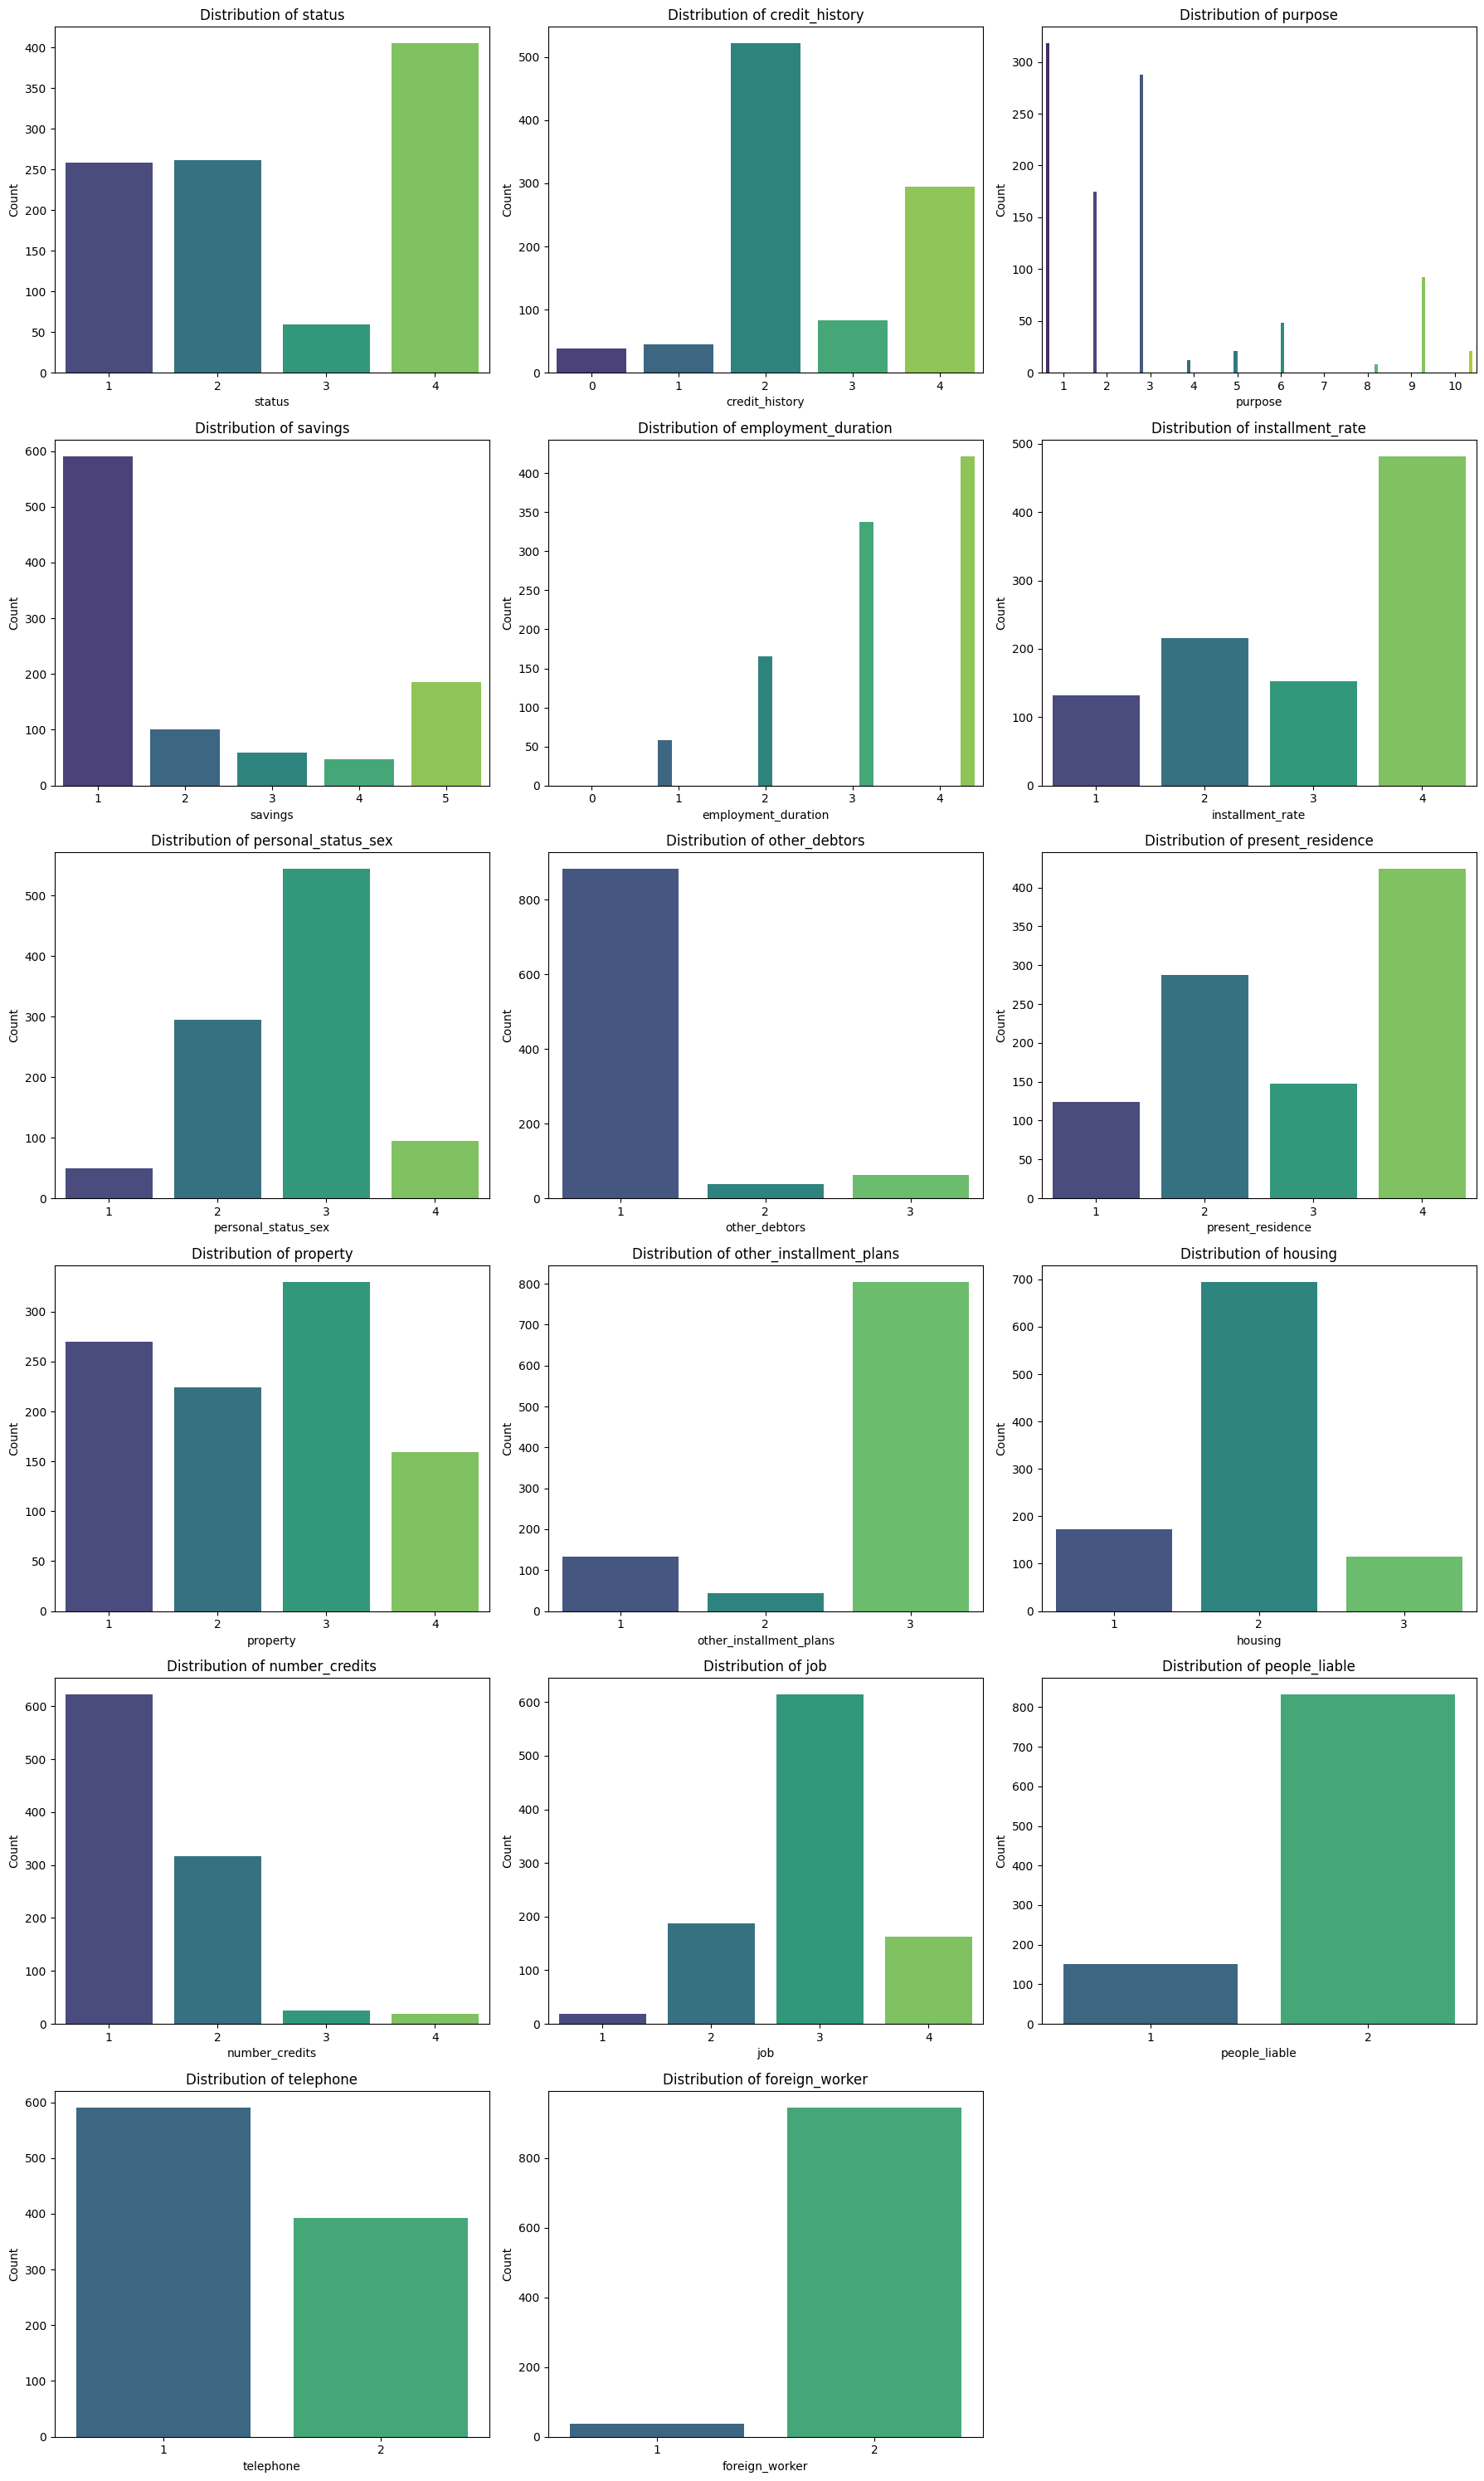

In [151]:
#@title Visualizar distribuciones de variables categóricas

import textwrap


print("--- Visualizando distribuciones con etiquetas envueltas (Versión Final Corregida) ---")

categorical_cols = df_modified.select_dtypes(include='category').columns
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(categorical_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    sns.countplot(data=df_modified, x=col, palette='viridis', hue=col, legend=False, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # --- LÓGICA CORREGIDA PARA LAS ETIQUETAS ---

    # 1. Obtenemos las ubicaciones y los textos de las etiquetas actuales
    ticks = ax.get_xticks()
    labels = [label.get_text() for label in ax.get_xticklabels()]

    # 2. Envolvemos los textos que sean muy largos
    wrapped_labels = [textwrap.fill(label, 10) for label in labels]

    # 3. CORRECCIÓN: Asignamos las ubicaciones con set_xticks y luego las etiquetas con set_xticklabels
    ax.set_xticks(ticks)
    ax.set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

In [152]:
#@title CELDA 9: Winsorizar variables numéricas para manejar outliers

from scipy.stats.mstats import winsorize
import numpy as np

# Identify the numerical columns (excluding categorical and the target)
# Let's assume numeric columns are those that are not 'category' and not 'credit_risk'
# We need to be careful if some numeric columns are currently 'object' or nullable Int64
# Let's identify all numeric types and exclude 'credit_risk'
numeric_cols = df_modified.select_dtypes(include=np.number).columns.tolist()
if 'credit_risk' in numeric_cols:
    numeric_cols.remove('credit_risk')

print("--- Estadísticas de variables numéricas ANTES de winsorizar ---")
display(df_modified[numeric_cols].describe())

# Iterar sobre cada columna numérica para aplicar la winsorización
# limits=[0.005, 0.005] means the bottom 0.5% and the top 0.5% will be clipped.
# This effectively keeps 99% of the data within the calculated range.
winsor_limits = [0.01, 0.01]
print(f"\n--- Aplicando winsorización con límites: {winsor_limits} ---")

for col in numeric_cols:
    # Ensure the column is of a numeric type that winsorize can handle
    # Convert to float temporarily if needed
    original_dtype = df_modified[col].dtype
    if original_dtype != np.float64 and original_dtype != np.int64:
         print(f"Converting column '{col}' to float64 for winsorization.")
         df_modified[col] = df_modified[col].astype(float)


    df_modified[col] = winsorize(df_modified[col], limits=winsor_limits)


print("\n--- Estadísticas de variables numéricas DESPUÉS de winsorizar ---")
display(df_modified[numeric_cols].describe())

print("\n✅ Winsorización completada en las columnas numéricas.")

--- Estadísticas de variables numéricas ANTES de winsorizar ---


,duration,amount,age
count,983.000000,983.000000,983.000000
mean,86.479145,4169.406918,46.217701
std,1856.283055,28361.309399,164.559405
min,4.000000,250.000000,19.000000
25%,12.000000,1374.000000,27.000000
50%,18.000000,2326.000000,33.000000
75%,24.000000,3962.000000,42.000000
max,58140.000000,887992.000000,4606.000000



--- Aplicando winsorización con límites: [0.01, 0.01] ---

--- Estadísticas de variables numéricas DESPUÉS de winsorizar ---


,duration,amount,age
count,983.000000,983.000000,983.000000
mean,21.202442,3266.479145,35.908444
std,12.446329,2798.018991,11.805957
min,6.000000,409.000000,20.000000
25%,12.000000,1374.000000,27.000000
50%,18.000000,2326.000000,33.000000
75%,24.000000,3962.000000,42.000000
max,60.000000,14421.000000,75.000000



✅ Winsorización completada en las columnas numéricas.


--- Visualizando histogramas de variables numéricas ---


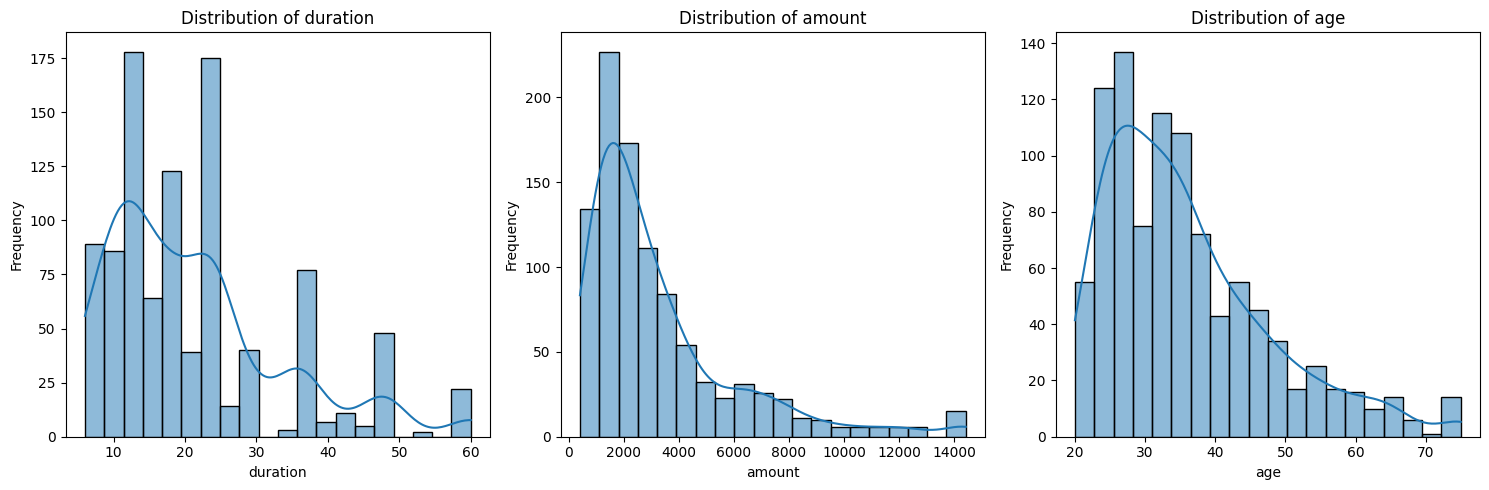

In [153]:
#@title Visualizar histogramas de variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Visualizando histogramas de variables numéricas ---")

# Identify numerical columns (including nullable integers)
numeric_cols = df_modified.select_dtypes(include=np.number).columns.tolist()

# Exclude binary/count columns where a histogram might not be the most informative
# Based on the data dictionary and previous analysis, 'people_liable', 'number_credits', and 'credit_risk'
# might be better treated as categorical or with value counts.
# Let's focus on 'duration', 'amount', and 'age' for histograms.
cols_for_histograms = ['duration', 'amount', 'age']
cols_for_histograms = [col for col in cols_for_histograms if col in numeric_cols] # Ensure they exist

if not cols_for_histograms:
    print("No se encontraron columnas numéricas adecuadas para histogramas.")
else:
    n_cols = 3
    n_rows = (len(cols_for_histograms) + n_cols - 1) // n_cols

    plt.figure(figsize=(15, n_rows * 5))
    plt.subplots_adjust(hspace=0.5) # Adjust spacing between plots

    for i, col in enumerate(cols_for_histograms):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data=df_modified, x=col, kde=True, bins=20) # Add KDE for density curve
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [156]:
#@title Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive montado exitosamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado exitosamente.


In [158]:
#@title Guardar el dataset limpio

# Save df_modified as df_clean
df_clean = df_modified.copy()

print("DataFrame df_modified guardado como df_clean.")

drive_folder_path = '/content/drive/MyDrive/MLOPS CLASE MNA/Proyecto/data/processed' # Adjust this path as needed

# Ensure the directory exists (optional, but good practice)
import os
os.makedirs(drive_folder_path, exist_ok=True)

output_csv_path = os.path.join(drive_folder_path, 'df_sgc_clean.csv')

try:
    # Save the DataFrame to a CSV file in Google Drive
    df_clean.to_csv(output_csv_path, index=False)
    print(f"DataFrame df_clean guardado exitosamente en: {output_csv_path}")

except Exception as e:
    print(f"Ocurrió un error al guardar el archivo en Google Drive: {e}")
    print("Por favor, asegúrate de que Google Drive está montado y la ruta especificada es correcta.")

DataFrame df_modified guardado como df_clean.
DataFrame df_clean guardado exitosamente en: /content/drive/MyDrive/MLOPS CLASE MNA/Proyecto/data/processed/df_sgc_clean.csv


# Referencias

Grömping, U. (2019). South German Credit Data: Correcting a Widely Used Data Set. Fachbereich II – Mathematik - Physik - Chemie, Beuth University of Applied Sciences Berlin. http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf

South German Credit [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5X89F.
